In [52]:
import pandas as pd

In [53]:
#Load the dataset
temp_data = pd.read_csv("temperature.csv")

In [54]:
co2_data = pd.read_csv("carbon_emmission.csv")

In [55]:
#data preview
temp_data_preview = temp_data.head()
co2_data_preview = co2_data.head()

In [56]:
temp_data_preview, co2_data_preview 

(   ObjectId                       Country ISO2 ISO3  F1961  F1962  F1963  \
 0         1  Afghanistan, Islamic Rep. of   AF  AFG -0.113 -0.164  0.847   
 1         2                       Albania   AL  ALB  0.627  0.326  0.075   
 2         3                       Algeria   DZ  DZA  0.164  0.114  0.077   
 3         4                American Samoa   AS  ASM  0.079 -0.042  0.169   
 4         5      Andorra, Principality of   AD  AND  0.736  0.112 -0.752   
 
    F1964  F1965  F1966  ...  F2013  F2014  F2015  F2016  F2017  F2018  F2019  \
 0 -0.764 -0.244  0.226  ...  1.281  0.456  1.093  1.555  1.540  1.544  0.910   
 1 -0.166 -0.388  0.559  ...  1.333  1.198  1.569  1.464  1.121  2.028  1.675   
 2  0.250 -0.100  0.433  ...  1.192  1.690  1.121  1.757  1.512  1.210  1.115   
 3 -0.140 -0.562  0.181  ...  1.257  1.170  1.009  1.539  1.435  1.189  1.539   
 4  0.308 -0.490  0.415  ...  0.831  1.946  1.690  1.990  1.925  1.919  1.964   
 
    F2020  F2021  F2022  
 0  0.498  1.327  2.01

In [57]:
temp_values = temp_data.filter(regex = '^F').stack()

In [58]:
temp_stats = {
    "Mean": temp_values.mean(),
    "Median" : temp_values.median(),
    "Variance" : temp_values.var()
}

In [59]:
co2_values = co2_data["Value"]
co2_stats = {
    "Mean" : co2_values.mean(),
    "Median" : co2_values.median(),
    "Variance" : co2_values.var()
}

In [60]:
temp_stats, co2_stats

({'Mean': 0.5377713483146068, 'Median': 0.47, 'Variance': 0.4294524831504378},
 {'Mean': 180.71615286624203,
  'Median': 313.835,
  'Variance': 32600.00200469294})

In [61]:
import plotly.graph_objects as go
import plotly.express as px

In [62]:
temp_years = temp_data.filter(regex = '^F').mean(axis = 0)
temp_years.index = temp_years.index.str.replace('F', ' ').astype(int)

In [63]:
co2_data['Year'] = co2_data['Date'].str[:4].astype(int)
co2_yearly = co2_data.groupby('Year')['Value'].mean()

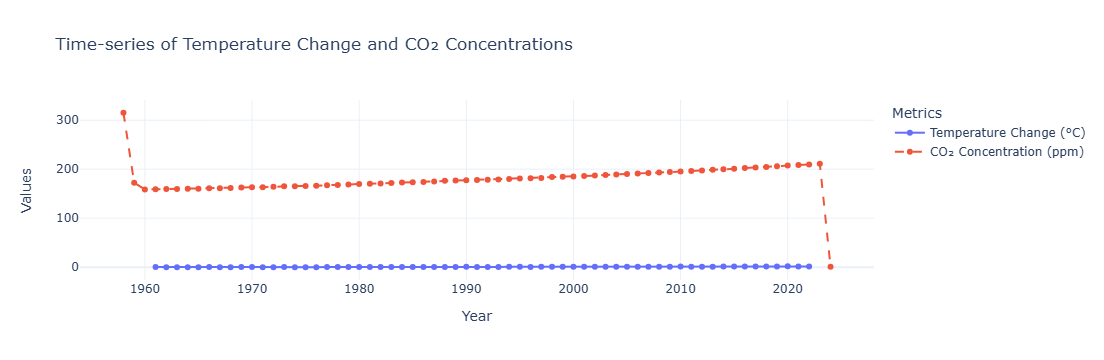

In [64]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=temp_years.index, y=temp_years.values,
    mode='lines+markers', name="Temperature Change (°C)"
))
fig.add_trace(go.Scatter(
    x=co2_yearly.index, y=co2_yearly.values,
    mode='lines+markers', name="CO₂ Concentration (ppm)", line=dict(dash='dash')
))
fig.update_layout(
    title="Time-series of Temperature Change and CO₂ Concentrations",
    xaxis_title="Year",
    yaxis_title="Values",
    template="plotly_white",
    legend_title="Metrics"
)
fig.show()

The time-series graph reveals a steady rise in CO₂ concentrations (in ppm) over the years, highlighting the ongoing buildup of greenhouse gases in the atmosphere. Alongside this, there is a modest upward trend in global temperature change, suggesting a link between increasing CO₂ levels and global warming. The alignment of these trends over time reinforces the hypothesis that CO₂ plays a significant role in driving temperature increases.

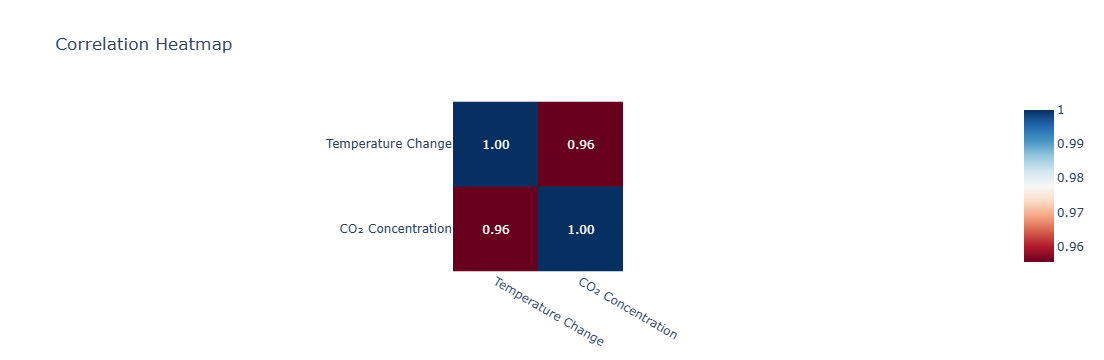

In [65]:
#Correlation heatmap

merged_data = pd.DataFrame({
    "Temperature Change": temp_years,
    "CO₂ Concentration": co2_yearly
}).dropna()

heatmap_fig = px.imshow(
    merged_data.corr(),
    text_auto=".2f",
    color_continuous_scale="RdBu",
    title="Correlation Heatmap"
)
heatmap_fig.update_layout(
    template="plotly_white"
)
heatmap_fig.show()

The heatmap displays a strong positive correlation (0.96) between CO₂ concentrations and temperature change, indicating that rising CO₂ levels are closely associated with increasing global temperatures. This strong statistical link underscores the critical need to reduce carbon emissions in order to combat climate change.

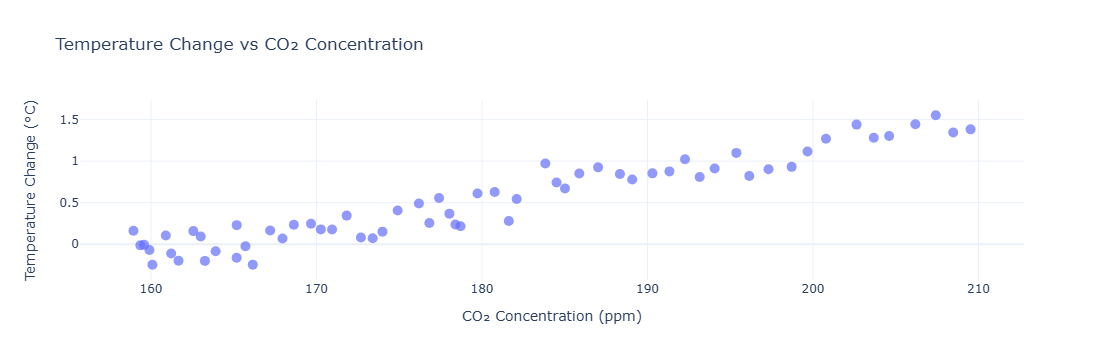

In [66]:
#Scatter plot - Temperature vs Co2 concentrations

scatter_fig = px.scatter(
    merged_data,
    x="CO₂ Concentration", y="Temperature Change",
    labels={"CO₂ Concentration": "CO₂ Concentration (ppm)", "Temperature Change": "Temperature Change (°C)"},
    title="Temperature Change vs CO₂ Concentration",
    template="plotly_white"
)
scatter_fig.update_traces(marker=dict(size=10, opacity=0.7))
scatter_fig.show()

The scatter plot illustrates a clear linear relationship, with higher CO₂ concentrations aligning with greater temperature changes. This visual trend reinforces the direct link between CO₂ emissions and global warming, supporting the need for policies aimed at reducing carbon emissions to address climate change.

**Trends and Seasonal Variations Analysis**


In [67]:
from scipy.stats import linregress

In [68]:
# temperature trend
temp_trend = linregress(temp_years.index, temp_years.values)
temp_trend_line = temp_trend.slope * temp_years.index + temp_trend.intercept


In [69]:
# CO2 trend
co2_trend = linregress(co2_yearly.index, co2_yearly.values)
co2_trend_line = co2_trend.slope * co2_yearly.index + co2_trend.intercept


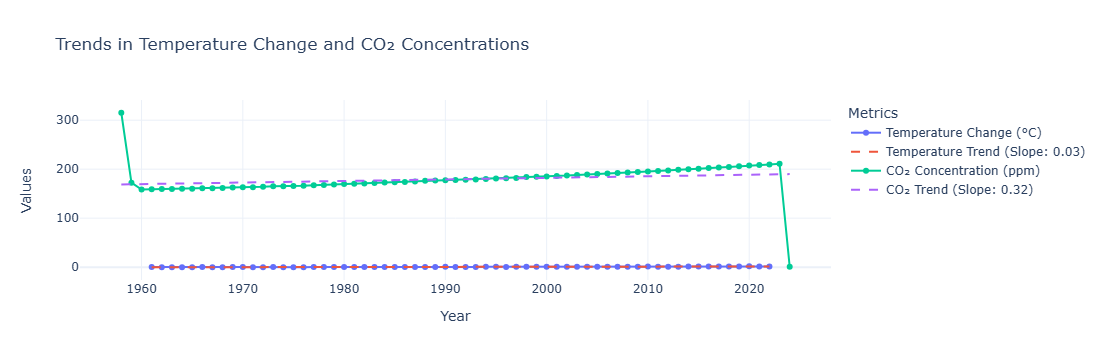

In [70]:
fig_trends = go.Figure()

fig_trends.add_trace(go.Scatter(
    x=temp_years.index, y=temp_years.values,
    mode='lines+markers', name="Temperature Change (°C)"
))
fig_trends.add_trace(go.Scatter(
    x=temp_years.index, y=temp_trend_line,
    mode='lines', name=f"Temperature Trend (Slope: {temp_trend.slope:.2f})", line=dict(dash='dash')
))
fig_trends.add_trace(go.Scatter(
    x=co2_yearly.index, y=co2_yearly.values,
    mode='lines+markers', name="CO₂ Concentration (ppm)"
))

fig_trends.add_trace(go.Scatter(
    x=co2_yearly.index, y=co2_trend_line,
    mode='lines', name=f"CO₂ Trend (Slope: {co2_trend.slope:.2f})", line=dict(dash='dash')
))

fig_trends.update_layout(
    title="Trends in Temperature Change and CO₂ Concentrations",
    xaxis_title="Year",
    yaxis_title="Values",
    template="plotly_white",
    legend_title="Metrics"
)
fig_trends.show()

The graph depicts linear trends for both temperature change and CO₂ concentrations over time, with their respective slopes highlighting the rate of increase. The steeper slope of CO₂ (0.32) compared to that of temperature (0.03) indicates that CO₂ levels are rising more rapidly. While the temperature increase is more gradual, its steady accumulation points to potential long-term climate consequences.

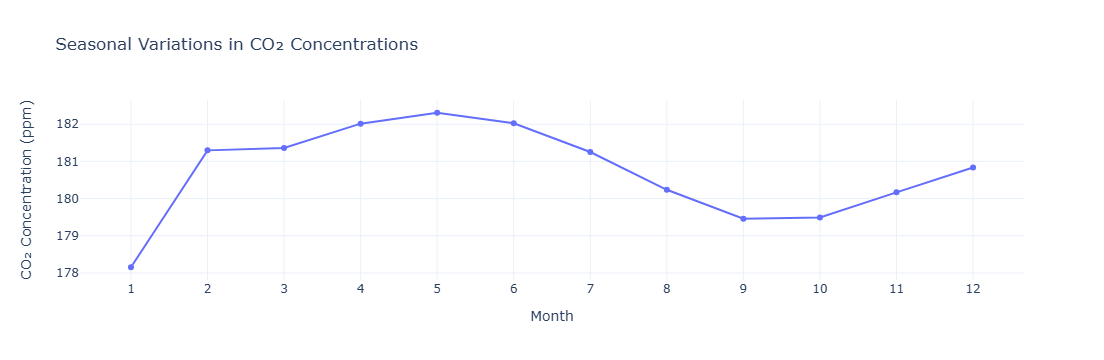

In [71]:
# seasonal variations in CO2 concentrations
co2_data['Month'] = co2_data['Date'].str[-2:].astype(int)
co2_monthly = co2_data.groupby('Month')['Value'].mean()

fig_seasonal = px.line(
    co2_monthly,
    x=co2_monthly.index,
    y=co2_monthly.values,
    labels={"x": "Month", "y": "CO₂ Concentration (ppm)"},
    title="Seasonal Variations in CO₂ Concentrations",
    markers=True
)
fig_seasonal.update_layout(
    xaxis=dict(tickmode="array", tickvals=list(range(1, 13))),
    template="plotly_white"
)
fig_seasonal.show()

The above graph highlights the seasonal fluctuations in CO₂ concentrations, which peak during late spring and early summer (around May) and reach the lowest levels in fall (around September). These variations are likely due to natural processes such as plant photosynthesis, which absorbs CO₂ during the growing season, and respiration, which releases CO₂ in the off-season. This seasonal cycle underscores the role of natural carbon sinks in moderating atmospheric CO₂ levels.


**Correlation and Causality Analysis**

In [72]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [73]:
from scipy.stats import pearsonr, spearmanr
from statsmodels.tsa.stattools import grangercausalitytests

# pearson and spearman correlation coefficients
pearson_corr, _ = pearsonr(merged_data["CO₂ Concentration"], merged_data["Temperature Change"])
spearman_corr, _ = spearmanr(merged_data["CO₂ Concentration"], merged_data["Temperature Change"])

# granger causality test
granger_data = merged_data.diff().dropna()  # first differencing to make data stationary
granger_results = grangercausalitytests(granger_data, maxlag=3, verbose=False)

# extracting p-values for causality
granger_p_values = {f"Lag {lag}": round(results[0]['ssr_chi2test'][1], 4)
                    for lag, results in granger_results.items()}

pearson_corr, spearman_corr, granger_p_values

(0.9554282559257312,
 0.9379013371609882,
 {'Lag 1': 0.0617, 'Lag 2': 0.6754, 'Lag 3': 0.2994})

Pearson Correlation (0.9554) indicates a very strong linear relationship between CO₂ concentrations and temperature changes. Spearman Correlation (0.9379) indicates a very strong monotonic relationship between CO₂ concentrations and temperature changes.

Granger Causality Test: The p-values for lags 1, 2, and 3 are as follows:

Lag 1: 0.0617 (slightly above the common significance threshold of 0.05, suggesting weak evidence for causality).
Lag 2: 0.6754 (not significant, no evidence of causality).
Lag 3: 0.2994 (not significant, no evidence of causality).

While there is a very strong correlation between CO₂ concentrations and temperature changes, the Granger Causality tests do not offer strong evidence that variations in CO₂ levels directly drive temperature changes within the time lags examined.

**Clustering Climate Patterns**

In [74]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

In [75]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*KMeans is known to have a memory leak.*")


In [76]:
# preparing the data for clustering
clustering_data = merged_data[["Temperature Change", "CO₂ Concentration"]].dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# applying K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # assuming 3 clusters for simplicity
clustering_data['Cluster'] = kmeans.fit_predict(scaled_data)

# adding labels for periods with similar climate patterns
clustering_data['Label'] = clustering_data['Cluster'].map({
    0: 'Moderate Temp & CO₂',
    1: 'High Temp & CO₂',
    2: 'Low Temp & CO₂'
})

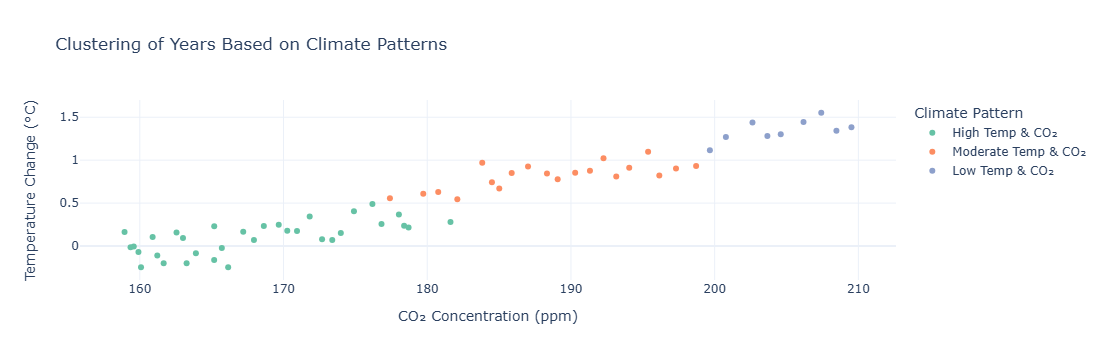

In [77]:
import plotly.express as px

fig_clusters = px.scatter(
    clustering_data,
    x="CO₂ Concentration",
    y="Temperature Change",
    color="Label",
    color_discrete_sequence=px.colors.qualitative.Set2,
    labels={
        "CO₂ Concentration": "CO₂ Concentration (ppm)",
        "Temperature Change": "Temperature Change (°C)",
        "Label": "Climate Pattern"
    },
    title="Clustering of Years Based on Climate Patterns"
)
fig_clusters.update_layout(
    template="plotly_white",
    legend_title="Climate Pattern"
)

fig_clusters.show()

The clustering graph categorizes years into three distinct climate patterns based on CO₂ concentrations and temperature change: low CO₂ and temperature (green), moderate CO₂ and temperature (orange), and high CO₂ and temperature (blue). The transition from green to orange to blue highlights a clear trend, with increasing temperature changes aligned with rising CO₂ levels, effectively demonstrating the correlation between greenhouse gas concentrations and global temperature shifts.

This clustering underscores the growing and cumulative impact of carbon emissions on global temperature patterns, reinforcing the urgency for targeted interventions to limit future increases.

**Predicting Temperature Changes**

For each scenario in the What-If analysis, I adjusted CO₂ concentrations by the specified percentage, input the data into the model, and predict the resulting temperature anomaly. The scenarios I simulate include:

1. 10% increase in CO₂: Predict the rise in temperature anomalies.

2.  10% decrease in CO₂: Estimate the cooling effect.

3.  20% increase in CO₂: Assess the impact of more aggressive emissions growth.

4.  20% decrease in CO₂: Evaluate the potential benefits of significant emissions reductions.

In [78]:
# setting up a simple predictive model using linear regression
from sklearn.linear_model import LinearRegression

# Preparing data
X = merged_data[["CO₂ Concentration"]].values  # CO₂ concentration as input
y = merged_data["Temperature Change"].values   # temperature change as target

model = LinearRegression()
model.fit(X, y)

# function to simulate "what-if" scenarios
def simulate_temperature_change(co2_percentage_change):
    # Calculate new CO2 concentrations
    current_mean_co2 = merged_data["CO₂ Concentration"].mean()
    new_co2 = current_mean_co2 * (1 + co2_percentage_change / 100)

    # predict temperature change
    predicted_temp = model.predict([[new_co2]])
    return predicted_temp[0]

# simulating scenarios
scenarios = {
    "Increase CO₂ by 10%": simulate_temperature_change(10),
    "Decrease CO₂ by 10%": simulate_temperature_change(-10),
    "Increase CO₂ by 20%": simulate_temperature_change(20),
    "Decrease CO₂ by 20%": simulate_temperature_change(-20),
}

scenarios

{'Increase CO₂ by 10%': 1.0866445037958155,
 'Decrease CO₂ by 10%': -0.059993041237237144,
 'Increase CO₂ by 20%': 1.6599632763123413,
 'Decrease CO₂ by 20%': -0.633311813753763}

A 10% increase in CO₂ leads to a substantial rise in temperature anomalies, highlighting the sensitivity of global temperatures to CO₂ levels. On the other hand, reducing CO₂ by 10-20% could result in significant cooling effects, potentially reversing some of the warming trends.

**Conclusion**

My analysis reveals a strong positive correlation between rising CO₂ concentrations and global temperature anomalies, with CO₂ levels increasing at a faster pace than temperature changes. Time-series and clustering analyses highlight clear patterns of growing emissions driving temperature rises, while seasonal variations emphasize the role of natural carbon sinks in moderating these effects. Lagged impacts indicate that current CO₂ levels exert the most substantial influence on temperature changes, with the effect of past emissions gradually diminishing. Simulating "what-if" scenarios illustrates the sensitivity of global temperatures to CO₂ levels, reinforcing the fact that even modest emission reductions could significantly slow global warming. These results underscore the urgent need for effective, actionable policies to combat climate change.